In [ ]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
customer_data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.shape

(200, 5)

In [ ]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
X = customer_data[["Annual Income (k$)","Spending Score (1-100)"]]

In [ ]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init = "k-means++", random_state = 42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

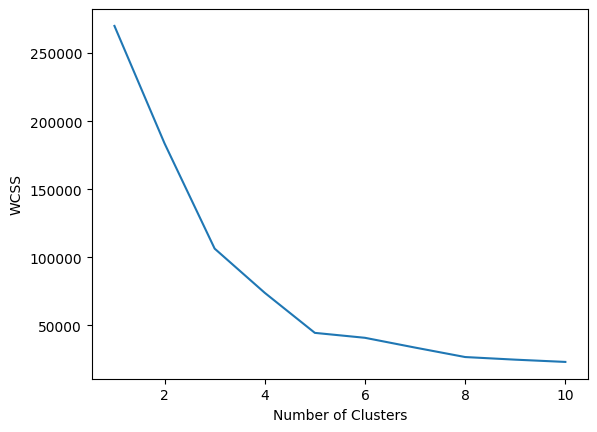

In [ ]:
plt.plot(range(1,11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
Y = kmeans.fit_predict(X)

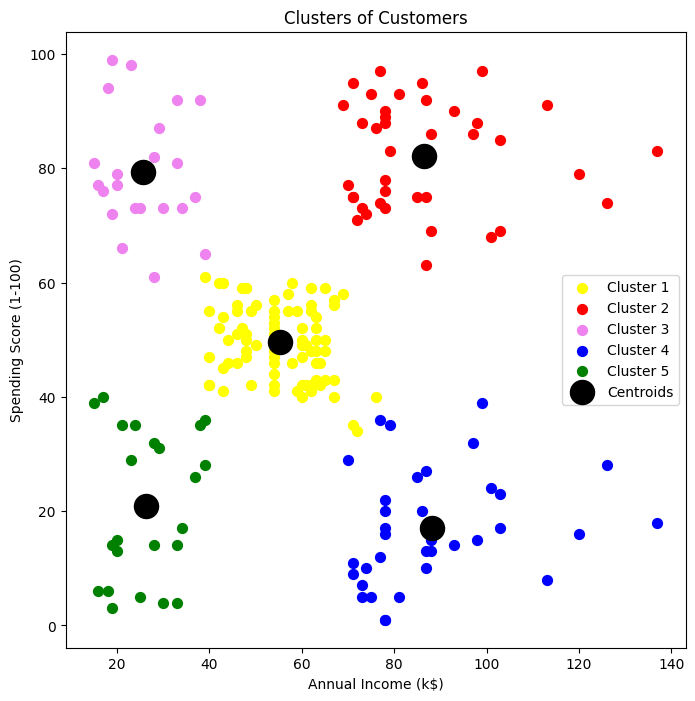

In [ ]:
plt.figure(figsize = (8,8))
# Use .iloc to select rows and columns after filtering with boolean array
plt.scatter(X.iloc[Y==0,0], X.iloc[Y==0,1], s = 50, c ='yellow', label = 'Cluster 1') # Changed to use .iloc
plt.scatter(X.iloc[Y==1,0], X.iloc[Y==1,1], s = 50, c ='red', label = 'Cluster 2') # Changed to use .iloc
plt.scatter(X.iloc[Y==2,0], X.iloc[Y==2,1], s = 50, c ='violet', label = 'Cluster 3') # Changed to use .iloc
plt.scatter(X.iloc[Y==3,0], X.iloc[Y==3,1], s = 50, c ='blue', label = 'Cluster 4') # Changed to use .iloc
plt.scatter(X.iloc[Y==4,0], X.iloc[Y==4,1], s = 50, c ='green', label = 'Cluster 5') # Changed to use .iloc

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = "black", label = "Centroids")

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()